In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train.flow_from_directory('xray_dataset_covid19/train',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


In [4]:
test = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_set = test.flow_from_directory('xray_dataset_covid19/test',
                                                 target_size = (64, 64),
                                                 batch_size = 2,
                                                 class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [5]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(input_shape=(64,64)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(2,activation='softmax')

])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(training_set,validation_data=testing_set, epochs=10)

Epoch 1/10
74/74 [==============================] - 15s 166ms/step - loss: 0.7094 - accuracy: 0.4595 - val_loss: 0.6220 - val_accuracy: 0.5000
Epoch 2/10
74/74 [==============================] - 12s 163ms/step - loss: 0.5700 - accuracy: 0.7365 - val_loss: 0.4866 - val_accuracy: 0.8250
Epoch 3/10
74/74 [==============================] - 12s 153ms/step - loss: 0.4338 - accuracy: 0.8176 - val_loss: 0.2487 - val_accuracy: 0.9500
Epoch 4/10
74/74 [==============================] - 11s 153ms/step - loss: 0.4079 - accuracy: 0.8378 - val_loss: 0.5121 - val_accuracy: 0.5750
Epoch 5/10
74/74 [==============================] - 12s 159ms/step - loss: 0.3578 - accuracy: 0.8784 - val_loss: 0.2918 - val_accuracy: 0.9500
Epoch 6/10
74/74 [==============================] - 12s 158ms/step - loss: 0.3428 - accuracy: 0.8581 - val_loss: 0.3613 - val_accuracy: 0.9000
Epoch 7/10
74/74 [==============================] - 12s 157ms/step - loss: 0.3509 - accuracy: 0.8784 - val_loss: 0.1896 - val_accuracy: 0.9500

In [14]:
model.evaluate(testing_set)

20/20 [==============================] - 5s 106ms/step - loss: 0.1523 - accuracy: 0.9750


[0.1522606760263443, 0.9750000238418579]

In [10]:
import joblib

In [33]:
joblib.dump(model,"covid_19 detection.joblob")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                            

['covid_19 detection.joblob']

In [13]:
model = joblib.load("covid_19 detection.joblob")

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-25 16:14:44         4126
metadata.json                                  2023-02-25 16:14:44           64
variables.h5                                   2023-02-25 16:14:44     19901624
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
...

In [6]:
def getlabel(x):
    for i in training_set.class_indices:
        if training_set.class_indices[i] == x:
            return i

In [7]:
import cv2

In [8]:
from tensorflow.keras.preprocessing import image

In [20]:
def predict_image(path):
    img = image.load_img(path,target_size=(64,64))
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    pred = [np.argmax(element) for element in p]
    print (plt.imshow(cv2.imread(path)))
    return getlabel(pred[0])

1/1 [==============================] - 0s 45ms/step
AxesImage(54,36;334.8x217.44)


'PNEUMONIA'

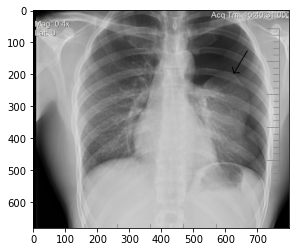

In [25]:
predict_image("Expiration-left-side-pneumo.jpg)

1/1 [==============================] - 0s 91ms/step
AxesImage(54,36;334.8x217.44)


'NORMAL'

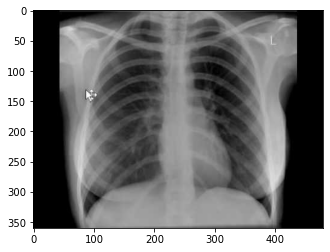

In [26]:
predict_image("hqdefault.jpg")